In [1]:
"""
Malaysian Election data dimension importance analysis via RandomForest by Jamie K
Questions to explore: 
1. Treating each age group as a dimension, which are the most important age groups that affect the election outcome?
2. Are these dimensions just as important in Y2013 elections? Which age groups were important in Y2013 and which were important in Y2018?

"""
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
ge14 = pd.read_excel("Tindak_GE14_Demographics_2018.xlsx", sheet_name = "age")
ge14 = ge14[['namaparlimen','21 - 30 (%)','31 - 40 (%)','41 - 50 (%)',
             '51 - 60 (%)','61 - 70 (%)','71 - 80 (%)','81 - 90 (%)','Above 90 (%)',
             'GE 2018 COALITION WINNER']]
ge14.set_index('namaparlimen', inplace = True)

#Split the data into train & test sets (0.75 & 0.25 size resepectively)
#Fixed variable for random state to enable replication of results
X_train, X_test, Y_train, Y_test = train_test_split(
    ge14[['21 - 30 (%)','31 - 40 (%)','41 - 50 (%)','51 - 60 (%)','61 - 70 (%)','71 - 80 (%)','81 - 90 (%)','Above 90 (%)']], 
    ge14['GE 2018 COALITION WINNER'], test_size = 0.10, random_state = 3)

#Initiate and train random forest model. Custom parameters:
#n_estimators: default is 10 but we are using 100 to reduce overfitting
#Fixed variable for random state to enable replication of results
clf = RandomForestClassifier(n_estimators = 100, random_state = 3)
clf.fit(X_train, Y_train)

print ("Accuracy of random forest in predicting electoral outcomes based on age group composition.")
print ("-----------------")
print ("Hygiene check: Accuracy of prediction on TRAIN data split (should be 100% accurate): {}".format(clf.score(X_train, Y_train)))
print ("Accuracy of prediction on TEST data split: {}".format(clf.score(X_test, Y_test)))
print ("-----------------")

Accuracy of random forest in predicting electoral outcomes based on age group composition.
-----------------
Hygiene check: Accuracy of prediction on TRAIN data split (should be 100% accurate): 1.0
Accuracy of prediction on TEST data split: 0.8260869565217391
-----------------


### Interpreting Random Forest Results

The model produced a pretty accurate prediction (82% accuracy) on 23 parliamentary seats (10% of the data is TEST data, and total rows was 222). But, let's actually look at a crosstab of the actual winner vs the model's predicted winner.

In [3]:
ge14["Random_forest_predicted_winner"] = clf.predict(ge14[['21 - 30 (%)','31 - 40 (%)','41 - 50 (%)','51 - 60 (%)','61 - 70 (%)','71 - 80 (%)','81 - 90 (%)','Above 90 (%)']])

ge14_crosstab = ge14.reset_index()
Y_rtest = Y_test.to_frame().reset_index()
ge14_crosstab = ge14_crosstab.merge(Y_rtest, how = 'inner', on = 'namaparlimen')

ge14_crosstab["Correct Prediction"] = np.nan
ge14_crosstab.loc[ge14_crosstab["GE 2018 COALITION WINNER_x"] == ge14_crosstab["Random_forest_predicted_winner"], "Correct Prediction"] = "YES"
ge14_crosstab.loc[ge14_crosstab["Correct Prediction"].isnull(), "Correct Prediction"] = "NO"
ge14_crosstab.set_index("namaparlimen", inplace=True)
ge14_crosstab[["GE 2018 COALITION WINNER_x", "Random_forest_predicted_winner", "Correct Prediction"]]

,GE 2018 COALITION WINNER_x,Random_forest_predicted_winner,Correct Prediction
namaparlimen,,,
KETEREH,BN,Gagasan Sejahtera,NO
KUALA NERUS,Gagasan Sejahtera,BN,NO
DUNGUN,Gagasan Sejahtera,Gagasan Sejahtera,YES
KEPALA BATAS,BN,PH,NO
BUKIT BENDERA,PH,PH,YES
IPOH BARAT,PH,PH,YES
GOPENG,PH,PH,YES
KUANTAN,PH,PH,YES
KUALA SELANGOR,PH,PH,YES


Thus, we can see the model is quite accurate in predicting the winners (only 4 mistakes). To improve the accuracy, we need a larger dataset. However, given the dataset is limited by the actual number of constituencies - this is possibly the best outcome we can hope to achieve

### According to the algorithm, which is the most important age group in deciding the election winner?

Now, for the ultimate reveal of the age group with the most influence on the Y2018 electorial results - this is the whole point of the exercise. An unbiased method of learning the 'most influential age group' in deciding Y2018's election results.

In [4]:
importance = pd.Series(clf.feature_importances_, index=X_train.columns)
importance.index = importance.index.map(lambda x: str(x)[:-4])
importance.sort_values(ascending = True, inplace = True)
importance

81 - 90     0.091618
71 - 80     0.116080
41 - 50     0.118557
31 - 40     0.120380
21 - 30     0.121949
Above 90    0.122296
61 - 70     0.132573
51 - 60     0.176549
dtype: float64

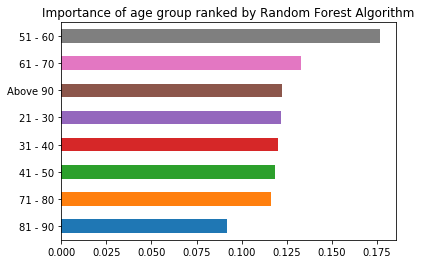

In [5]:
importance.plot(kind='barh', title = "Importance of age group ranked by Random Forest Algorithm")

According to the algorithm, the most important age group in deciding Y2018 election results is the AGE group 51-60, with the largest importance weight across all age groups (17% weightage). 

In very loose layman's terms, one could say the age group 51-60 mattered 5% more than the age group 21-30 when it comes to deciding the winning political party in each constituency. 

The algorithm detected this importance weightage via randomly generating 100 decision trees around the 'age group' demographic dataset (many trees, thus its name 'random forest') to eventually arrive at the winning political party - the discovered weightage is then 'tested' via the 10% test data (23 parlimentary seats). This had a 82% accuracy, which is valid enough to give us the 'importance score' of each age group.

As mentioned above, to improve the 82% accuracy rate, the model needs more datapoints, but this is not possible because each data point is a parlimentary seat. We can't 'increase' datapoints without increasing the number of seats.

### Caveats/Disclaimers on this results

Please note this is a modelled output. 

One notable weakness of this result is the age data itself: while I have no reason to doubt the data is reliable - the fact of the matter is we are unable to validate each voter's age (voters that actually showed up and voted). This is because voting in an election is an anonyamous behavior, there are no demographic data points attached to each vote.

Instead, this is an analysis based on REGISTERED voters. It is entirely possible for one to be registered, but did not show up to vote on polling day.

With this analysis we are assuming: turn out rate is similar across all age groups (e.g. 30% turnout rate for all age groups) OR EVERYONE voted (100% turnout rate for all age groups). Alternatively, turnout rate is a completely random phenomenon across all age groups.

# Further deciphering the most important age group

The random forest output surfaced another question: did the age group 51-60 'steal' importance score from the other age groups? 

In general, age split is a zero-sum game. This means: if more proportion of a constituency falls under an age group, another age group needs to have less proportion, because the sum of proportions of every age group needs to equal 100%. 

Thus, the question here is: did the 51-60 age group correlate with a lower proportion in the other age groups, across all constituencies? Did age group 51-60 'steal' population proportions from the other age groups?

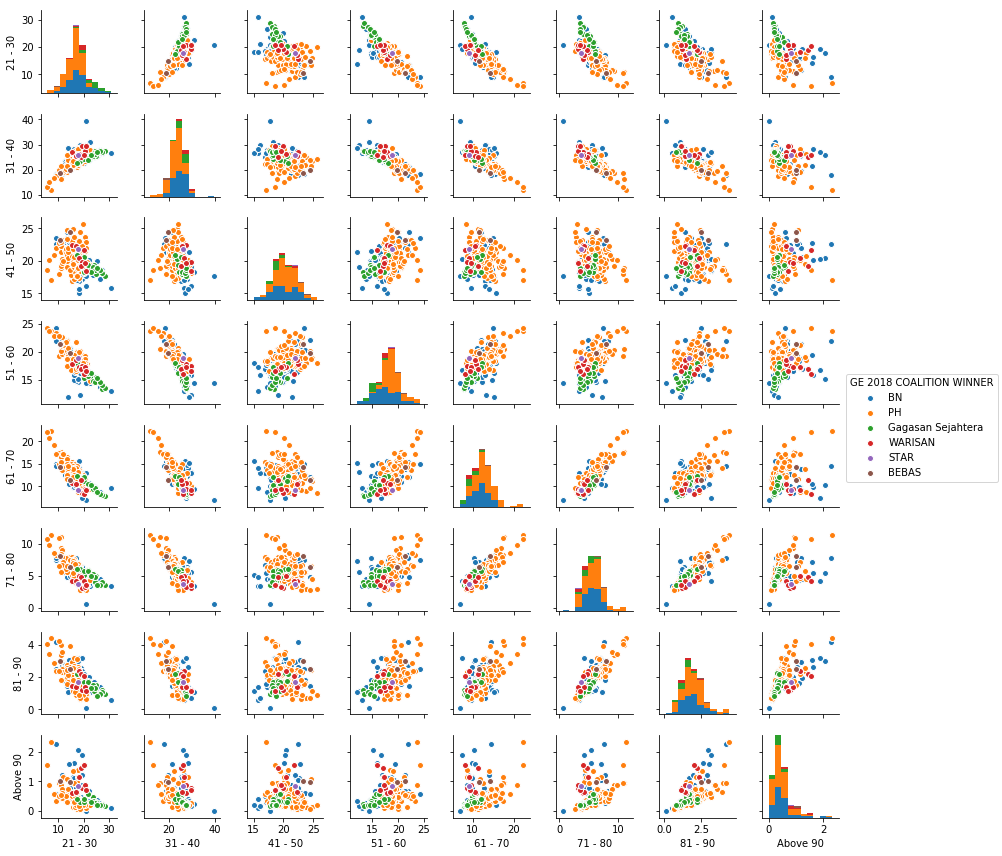

In [6]:
ge14_age_subset = ge14[['21 - 30 (%)','31 - 40 (%)','41 - 50 (%)','51 - 60 (%)','61 - 70 (%)','71 - 80 (%)','81 - 90 (%)','Above 90 (%)', 'GE 2018 COALITION WINNER']]
ge14_age_subset.set_index("GE 2018 COALITION WINNER", inplace= True)
ge14_age_subset.columns = ge14_age_subset.columns.map(lambda x: str(x)[:-4])
ge14_age_subset.reset_index(inplace= True)
sns.pairplot(ge14_age_subset, hue='GE 2018 COALITION WINNER', size=1.5)

### Interpreting the paired plot chart

This is a plot of all age groups (x-axis) vs every other age group (y-axis), plotting them pair-by-pair. 

As mentioned earlier, percentage (proportion) age split of the constituencies is a zero-sum game: if a constituency has more percentage of its voters within a certain age group, it should have a corresponding lower percentage of voters in another age group. The question here is: if 51-60 has a higher percentage in a constituency, which age group 'suffers' with a lower percentage?

In this paired-plot, ignore the diagonal axis, which is a histogram of the given age group color-coded by winning political party. Observations:

1. To read the other plots, we are looking at age group in the x-axis vs y-axis. So, let's take the 1st column, 2nd row plot. This plots age group 21-30 vs age group 31-40 (x-axis vs y-axis). In this plot, we see a pattern that moves upwards to the right-hand top corner. This means: constituencies with higher percentage in 21-30 age group also shows a higher percentage in the 31-40 age group. A positive correlation pattern exists between the 21-30 and 31-40 age group.

2. We can confirm this pattern by looking at the corresponding plot 31-40 vs 21-30, which is in the 2nd column, 1st row plot. Here, we see the same positive correlation plot (higher 31-40 shows higher 21-30).

3. Interesting note: if we looked at states with high 21-30 AND high 31-40 (these are plots we studied in point 1 & 2), these are GAGASAN SEJAHTERA seats (green data points). In particular, a seat with very high 21-30 age groups is correlated with a win by GAGASAN SEJAHTERA.

4. Now that we know how to interpret these charts, let's quickly scan for patterns. Over here, we are interested to know which age groups shows a 'decline' in population proportions as age group 51-60 increased in proportions: let's JUMP to the row 51-60 (on the y-axis). 

5. Here, we see age group 51-60 being NEGATIVELY correlated with the two youngest age group: 21-30 and 31-40. This means: a seat with higher 51-60 percentage 'steals' percentages from the two younger age groups. 

6. Also, seats with higher older age groups (51 & above, with exception for 'above 90' age group) tends to be PAKATAN HARAPAN seats (orange data points).

7. Note: There is an outlier in on the row 31-40 (Y-axis 31-40). The outlier blue dot (a BN seat) is Putrajaya, with a 39.5% of its population being in the age group 31-40. This age group 'stole' proportions from the older age groups (61 & above), therefore you see it as an outlier in the other age group rows as well.

#### Conclusion of the exercise: Random Forest & Paired-plot correlation charts

With this exercise, we discovered the following:
1. The Random Forest algorithm informed us Age 51-60 was the 'most influential' age group. From there, we knew we needed to dig further into the age splits, with a keen eye on 51-60.

2. With the help of the paired-plot correlation charts, we further discovered:

    1. Parlimentary seats with very high percentage of younger voters (21-30 & 31-40) tend to be GAGASAN SEJAHTERA seats.
    2. Parliamentary seats with very high percentage of older voters (51 and above, with exception for '90 & above' age group), tends to be PAKATAN HARAPAN seats.
    3. Investigating the age group zero-sum phenomenon, the age group 51-60 'steals' proportion from the 21-30 & 31-40 age groups, and tends to correlate with a higher proportion of 'older' age groups. I.E. seats with more 51-60 year olds tend to also have more 61-70, 71-80, and 81-90 year olds.
    4. It is highly likely the GE14 Pakatan Harapan 'Tsunami' was led by the older generation (above 51 years old)